# Project 2
### CS 5/7394 - Applied Machine Learning

- **Due** - March 11 @ 11:59 pm pushed to Github repo
- **Teams** - You can do this project solo or in pairs.  Not 3, not 4 not 5... Max of 2. If a 5394 student pairs with a 7394 student, the pair needs to do the 7394 work. 

Below are 6 Kaggle Datasets.  You will choose 1 to work with for this project. 

- [Airfare Prediction Dataset](https://www.kaggle.com/zwartfreak/airline-fare-prediction)
- [Chinese Rest Holiday Dataset](https://www.kaggle.com/holoong9291/chinese-rest-holiday-dataset-2020-to-2022)
- [Jigsaw Toxic Comment Classification Challenge](https://www.kaggle.com/julian3833/jigsaw-toxic-comment-classification-challenge?select=train.csv)
- [Latest Covid 19 Dataset Worldwide](https://www.kaggle.com/sandhyakrishnan02/latest-covid-19-dataset-worldwide)
- [Trains](https://www.kaggle.com/vahidehdashti/machinelearningdatabase-trains?select=trains-original.data)
- [Football Data top 5 Leagues](https://www.kaggle.com/sanjeetsinghnaik/football-data-top-5-leagues)

Merging disparate datasets is a staple of the data exploration process.  Therefore, for which ever data set above that you choose, you will need to independently find **an additional** dataset to merge with your selection.  The only requirement is that it add to the richness of the original dataset. Students in the 7000-level version of the class need to find two additional data sets to merge with the original selection. 

_Note_: If you want to start with a different data set, you need to get Fontenot's OK first.  

### Your Tasks

Below, there are cells that provide directions on what to do for the project.  

You can insert as many cells between the ones below as you'd like, but please **Do NOT** change the cells already provided. 

### Part 1 - Getting Started

- Import libraries
- Load original Data (which ever one you chose from the provided list) into a data frame. 
- Load your additional data set(s) into a data frame. 
- In a markdown cell, provide a brief description of your the data sets you've chosen to work with.  
- Develop a list of 3 - 4 questions that you hope to be able to answer after the exploration of the data and write them in this section. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

original = pd.read_csv("C:/Users/ary00/Documents/Project2/archive/english_premier_league_data.csv")
extended = pd.read_csv("C:/Users/ary00/Documents/Project2/season-1819_csv.csv")

The "Football Data: Top 5 Leagues" dataset contains match data for the top 5 football leagues ranging from 2014-2020. From this set we have isolated the English Premier League Dataset, which contains the same information for only the games played in the English Premier League. This dataset describes attributes such as final score, home and away team ratings, possession, match excitement, and many others. Each row corresponds to one game played in the league.

The second dataset we selected is a much more robust collection of attributes regarding the English Premier League ranging from 2018-2019. This "extended" dataset contains attributes such as number of assists, name of the referee, Home/Away team shots, fouls, clears, yellow/red cards, etc. This dataset also contains betting odds from various bookkeepers for various teams.

#### Questions
How accurately can the betting odds predict the winner of a game?
How accurately can the betting odds predict if the game will result in a draw?
How much does being the home team affect the chance of winning a game?
How much does the number of corners a team has affect the amount of goals they score?
How accurately can the halftime score predict the full-time score?
How does the specific referee affect the number of red/yellow cards given?
How well does the number of shots on target predict the number of goals scored compared to the number of shots?

### Part 2 - Data Inspection

Write some code to summarize the datasets.  Think about the following questions:
- What type of data is each variable? (think like a data scientist here, not a computer scientist)
- What is the total size of the data sets?
- What time boundaries are there in the dataset?  IOW, what time frame do they span?
- Are there any missing values in any of the variables? 

Do this with Intentionality.  Don't skimp.

In [2]:
extended.drop(extended.iloc[:, 38:61], inplace = True, axis = 1)
extended.drop(extended.columns[len(extended.columns)-1], axis=1, inplace=True)
extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

In [3]:
original.head()

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
0,0,MAN UTD,SWANSEA,1-2,0-1,5.9,5.6,7.6,60,40,...,35.0,20.0,4.0,0.0,0.0,1,2,2,1,2014
1,1,WEST BROM,SUNDERLAND,2-2,1-1,7.3,6.5,7.4,58,42,...,42.0,9.0,1.0,0.0,0.0,2,2,2,2,2014
2,2,LEICESTER CITY,EVERTON,2-2,1-2,7.0,6.5,6.3,37,63,...,28.0,10.0,1.0,0.0,0.0,2,2,2,2,2014
3,3,WEST HAM,TOTTENHAM,0-1,0-0,4.8,5.9,6.4,47,53,...,27.0,10.0,0.0,0.0,1.0,0,1,1,0,2014
4,4,QPR,HULL CITY,0-1,0-0,3.8,5.7,6.6,51,49,...,56.0,10.0,2.0,0.0,0.0,0,1,1,0,2014


In [4]:
extended.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,7.50,1.55,3.80,7.00,1.58,3.93,7.50,1.57,3.8,6.00
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,4.40,1.90,3.50,4.10,1.89,3.63,4.58,1.91,3.5,4.00
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,2.95,2.40,3.30,2.95,2.50,3.46,3.00,2.45,3.3,2.80
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.57,6.20,4.00,1.55,6.41,4.02,1.62,5.80,3.9,1.57
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,2.00,3.70,3.35,2.05,3.83,3.57,2.08,3.80,3.2,2.05


In [5]:
original.describe()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1329.500000,5.348571,6.476692,6.238797,51.321429,48.678571,5.378947,4.670677,13.858271,3.818045,...,26.070301,10.986466,1.757143,0.035338,0.040602,1.504511,1.207143,1.207143,1.504511,2017.000000
std,768.020182,1.693194,0.995476,0.990078,12.403523,12.403523,2.731567,2.622373,5.668131,2.549099,...,11.327858,3.523387,1.281851,0.186694,0.206709,1.294090,1.182304,1.182304,1.294090,2.000376
min,0.000000,1.700000,2.400000,1.300000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,664.750000,4.100000,5.800000,5.600000,42.000000,39.000000,3.000000,3.000000,10.000000,2.000000,...,18.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,1329.500000,5.300000,6.500000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,...,25.000000,11.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,1994.250000,6.400000,7.100000,6.900000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,...,33.000000,13.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,2659.000000,10.000000,10.000000,10.000000,83.000000,82.000000,16.000000,17.000000,43.000000,19.000000,...,79.000000,26.000000,9.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,2020.000000


In [6]:
extended.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,5.205237,3.047526,4.295789,4.967132,3.229184,4.527026,5.584342,3.149395,4.368895,5.339579
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,5.133880,2.623373,1.512122,4.667690,3.000273,1.819129,5.760324,2.970813,1.713942,5.648228
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.130000,1.070000,2.950000,1.120000,1.070000,3.040000,1.130000,1.050000,3.000000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,2.250000,1.600000,3.400000,2.287500,1.590000,3.460000,2.330000,1.570000,3.400000,2.250000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,3.300000,2.250000,3.650000,3.300000,2.300000,3.815000,3.430000,2.250000,3.700000,3.275000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,6.000000,3.150000,4.525000,5.525000,3.270000,4.857500,6.535000,3.200000,4.750000,6.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,36.000000,20.000000,12.000000,29.000000,21.510000,14.960000,42.940000,21.000000,13.000000,46.000000


In [7]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 41 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     2660 non-null   int64  
 1   Home Team                      2660 non-null   object 
 2   Away Team                      2660 non-null   object 
 3   Score                          2660 non-null   object 
 4   Half Time Score                2660 non-null   object 
 5   Match Excitement               2660 non-null   float64
 6   Home Team Rating               2660 non-null   float64
 7   Away Team Rating               2660 non-null   float64
 8   Home Team Possession %         2660 non-null   int64  
 9   Away Team Possession %         2660 non-null   int64  
 10  Home Team Off Target Shots     2660 non-null   float64
 11  Home Team On Target Shots      2660 non-null   float64
 12  Home Team Total Shots          2660 non-null   f

In [8]:
extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 38 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Div       380 non-null    object 
 1   Date      380 non-null    object 
 2   HomeTeam  380 non-null    object 
 3   AwayTeam  380 non-null    object 
 4   FTHG      380 non-null    int64  
 5   FTAG      380 non-null    int64  
 6   FTR       380 non-null    object 
 7   HTHG      380 non-null    int64  
 8   HTAG      380 non-null    int64  
 9   HTR       380 non-null    object 
 10  Referee   380 non-null    object 
 11  HS        380 non-null    int64  
 12  AS        380 non-null    int64  
 13  HST       380 non-null    int64  
 14  AST       380 non-null    int64  
 15  HF        380 non-null    int64  
 16  AF        380 non-null    int64  
 17  HC        380 non-null    int64  
 18  AC        380 non-null    int64  
 19  HY        380 non-null    int64  
 20  AY        380 non-null    int64 

#### Data types
The attributes of the original English Premier League dataset are entirely numerical save for the home/away team names and the scores (which, while numerical, are stored as hyphenated strings). Most of these attributes are also discrete, such as number of red and yellow cards or blocked shots.

The attributes of the extended English Premier League dataset are predominantly numerical as well, although it contains string data such as the home/away team names, date, and categorical data such as FTR or Full-Time Result (which denotes whether the Home or Away team won).

#### Size
The original English Premier League dataset contains 2660 entries across 41 columns, while the extended dataset contains 380 entries across 62 columns. Combined this gives us a total of 3040 entries across 103 columns. 

#### Time frame
While the original English Premier League dataset doesn't contain a date attribute, we know that it holds data from 2014-2020.
The extended dataset contains data from October 2018 to December 2019.

#### Missing Values
As we can see from the .info functions above, neither dataset contains null or missing values.

### Part 3 - Data Description

- Create a data description (data dictionary) for your data sets.
    - Describe each variable
    - If categorical, what levels are present? If the levels are encoded, what do the codes mean?
    - If numeric, provide min, max, median and any other univariate stats you'd like to add in. 
- Where appropriate, provide histograms or other visualizations to characterize each variable. 

### Football English Premier League Kaggle Dataset
column headers : description : variable_type
'#' : Match number, starts at match 0 and increments for each match in the dataset : integer <br>
Home Team : Name of team who is home : string <br>
Away Team : Name of team who is away : string<br>
Score : Final score of the game, home team score is first and away team score is second : string <br>
Half Time Score: Score of the game at half time, home team score is first and away team score is second : string <br>
Match Excitement : number one through ten rating the excitement of the match (dataset doesnt specify how this number is calculated) : float <br>
Home Team Rating : number one through ten rating how good the home team is (dataset doesnt specify how this number is calculated) : float <br>
Away Team Rating : number one through ten rating how good the away team is (dataset doesnt specify how this number is calculated) : float <br>
Home Team Possesion % : % of possesion the home team has during a full game : float <br>
Away Team Possesion % : % of possesion the away team has during a full game  : float <br>
Home Team Off Target Shots : home team shots not on goal  : float <br>
Home Team On Target Shots : home team shots on goal : float <br>
Home Team Total Shots : home team total number of shots : float <br>
Home Team Blocked Shots : home team number of shots saved by goalie or blocked by an opposing player : float <br>
Home Team Corners : home team number of corners : float <br>
Home Team Throw Ins  : number of times home team threw the ball in after the ball went out of bounds : float <br>
Home Team Pass Success % : percentage of passes the home team made without it being intercepted or blocked by the opposing team : float <br>
Home Team Aerials Won : home team number of aerials won (an aerial is a pass that travels through the air and not on the ground : float <br>
Home Team Clearances : number of times home team sucesfully cleared the ball : float <br>
Home Team Fouls : number of fouls commited by the home team : float <br>
Home Team Yellow Cards : number of yellow cards the home time received : float <br>
Home Team Second Yellow Cards : number of times someone on the home time received a second yellow card : float <br>
Home Team Red Cards : number of red cards the home team received : float
Away Team Off Target Shots : away team shots not on goal  : float <br>
Away Team On Target Shots : away team shots on goal : float <br>
Away Team Total Shots : away team total number of shots : float <br>
Away Team Blocked Shots : away team number of shots saved by goalie or blocked by an opposing player : float <br>
Away Team Corners : away team number of corners : float <br>
Away Team Throw Ins  : number of times away team threw the ball in after the ball went out of bounds : float <br>
Away Team Pass Success % : percentage of passes the away team made without it being intercepted or blocked by the opposing team : float <br>
Away Team Aerials Won : away team number of aerials won (an aerial is a pass that travels through the air and not on the ground : float <br>
Away Team Clearances : number of times away team sucesfully cleared the ball : float <br>
Away Team Fouls : number of fouls commited by the away team : float <br>
Away Team Yellow Cards : number of yellow cards the away time received : float <br>
Away Team Second Yellow Cards : number of times someone on the away team received a second yellow card : float <br>
Away Team Red Cards : number of red cards the away team received : float <br>
Home Team Goals Scored : number of total goals scored by the home team : int  <br>
Away Team Goals Scored : number of total goals scored by the away team : int <br>
Home Team Goals Conceded : number of total goals allowed by the home team : int <br>
Away Team Goals Conceded : number of total goals allowed by the away team : int
year : year the match took place : int  <br>

In [9]:
original.describe()

,Unnamed: 0,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,Home Team Off Target Shots,Home Team On Target Shots,Home Team Total Shots,Home Team Blocked Shots,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,...,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1329.500000,5.348571,6.476692,6.238797,51.321429,48.678571,5.378947,4.670677,13.858271,3.818045,...,26.070301,10.986466,1.757143,0.035338,0.040602,1.504511,1.207143,1.207143,1.504511,2017.000000
std,768.020182,1.693194,0.995476,0.990078,12.403523,12.403523,2.731567,2.622373,5.668131,2.549099,...,11.327858,3.523387,1.281851,0.186694,0.206709,1.294090,1.182304,1.182304,1.294090,2.000376
min,0.000000,1.700000,2.400000,1.300000,18.000000,17.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000
25%,664.750000,4.100000,5.800000,5.600000,42.000000,39.000000,3.000000,3.000000,10.000000,2.000000,...,18.000000,9.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2015.000000
50%,1329.500000,5.300000,6.500000,6.200000,51.000000,49.000000,5.000000,4.000000,13.000000,3.000000,...,25.000000,11.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,2017.000000
75%,1994.250000,6.400000,7.100000,6.900000,61.000000,58.000000,7.000000,6.000000,17.000000,5.000000,...,33.000000,13.000000,3.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2019.000000
max,2659.000000,10.000000,10.000000,10.000000,83.000000,82.000000,16.000000,17.000000,43.000000,19.000000,...,79.000000,26.000000,9.000000,2.000000,2.000000,9.000000,9.000000,9.000000,9.000000,2020.000000


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Match Excitement'}>,
        <AxesSubplot:title={'center':'Home Team Rating'}>,
        <AxesSubplot:title={'center':'Away Team Rating'}>,
        <AxesSubplot:title={'center':'Home Team Possession %'}>,
        <AxesSubplot:title={'center':'Away Team Possession %'}>],
       [<AxesSubplot:title={'center':'Home Team Off Target Shots'}>,
        <AxesSubplot:title={'center':'Home Team On Target Shots'}>,
        <AxesSubplot:title={'center':'Home Team Total Shots'}>,
        <AxesSubplot:title={'center':'Home Team Blocked Shots'}>,
        <AxesSubplot:title={'center':'Home Team Corners'}>,
        <AxesSubplot:title={'center':'Home Team Throw Ins'}>],
       [<AxesSubplot:title={'center':'Home Team Pass Success %'}>,
        <AxesSubplot:title={'center':'Home Team Aerials Won'}>,
        <AxesSubplot:title={'center':'Home Team Clearances'}>,
        <AxesSubplot:title={'center':'Home Team Fouls'}

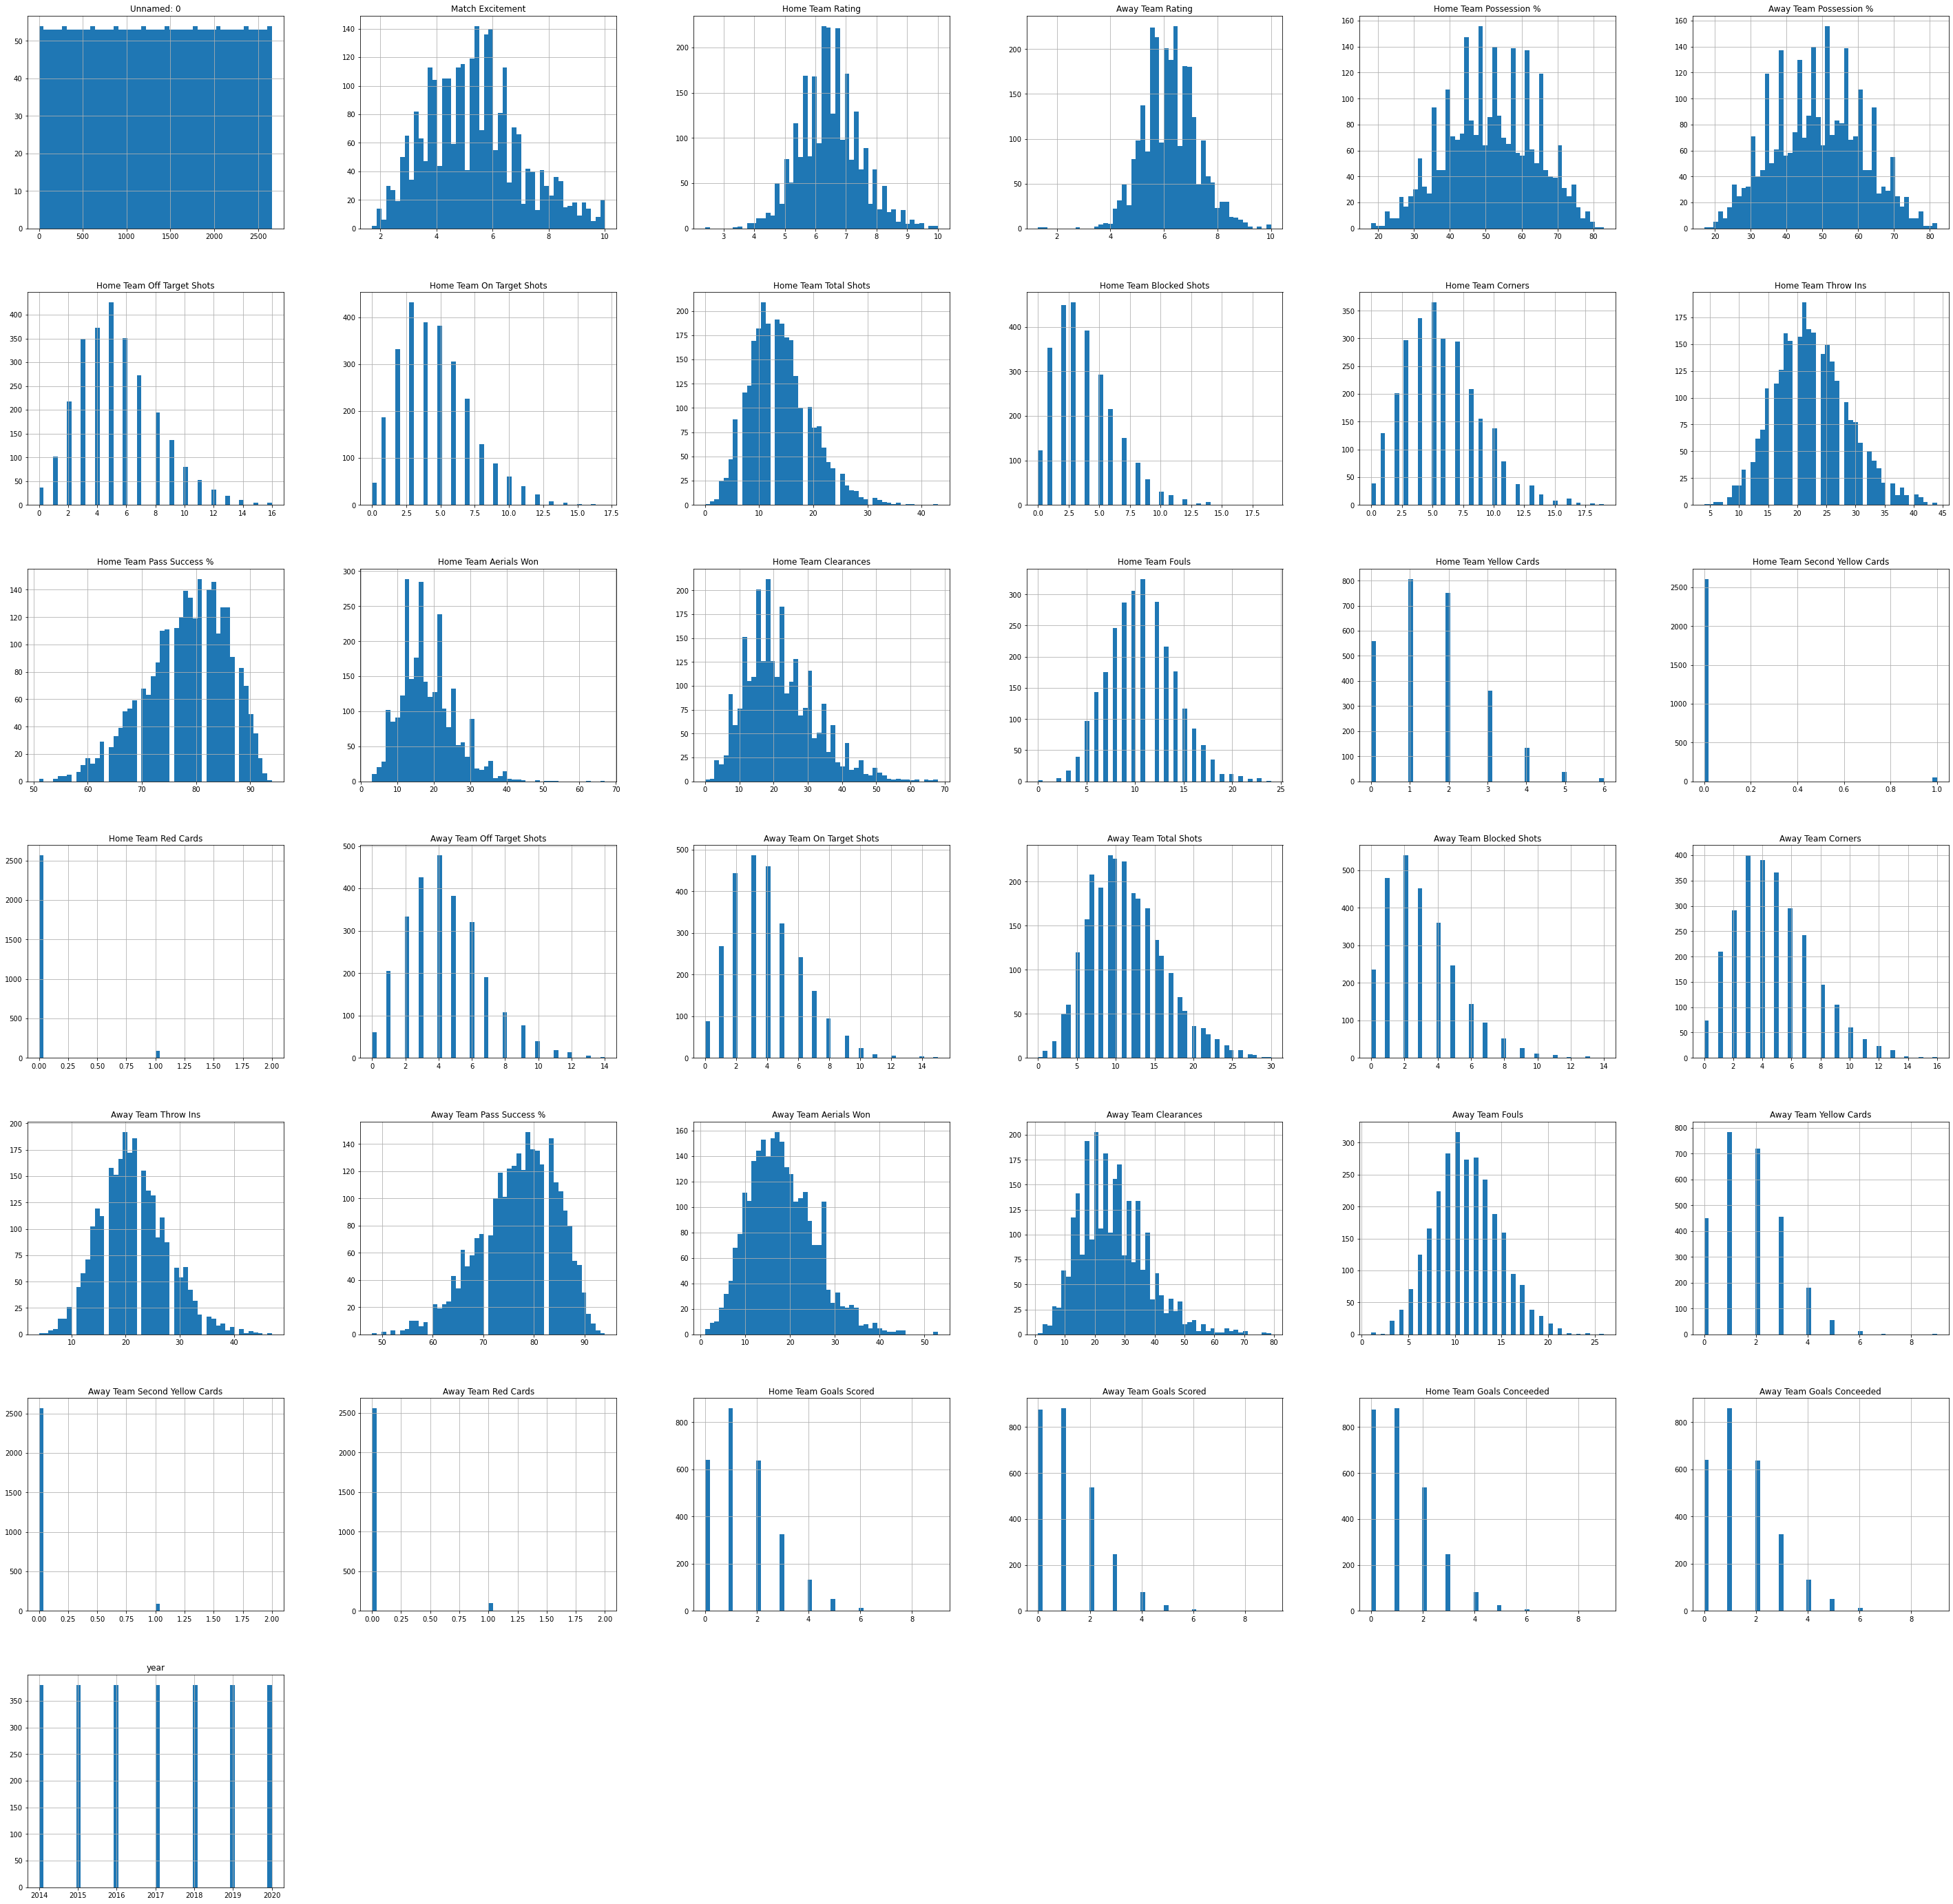

In [10]:
original.hist(bins=50, figsize=(50,50))

<AxesSubplot:xlabel='Home Team Possession %', ylabel='Home Team Goals Scored'>

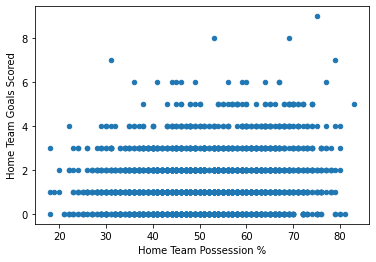

In [11]:
original.plot(kind="scatter", x="Home Team Possession %", y="Home Team Goals Scored", alpha=1)

<AxesSubplot:xlabel='Away Team Rating', ylabel='Away Team Possession %'>

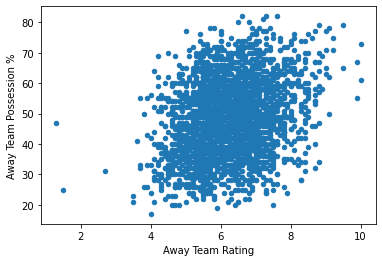

In [12]:
original.plot(kind="scatter", x="Away Team Rating", y="Away Team Possession %", alpha=1)

<AxesSubplot:xlabel='Away Team Clearances', ylabel='Home Team Possession %'>

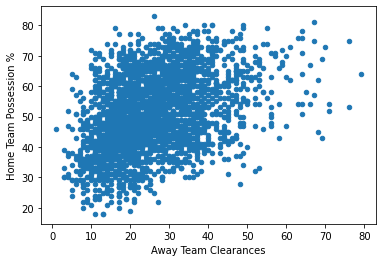

In [13]:
original.plot(kind="scatter", x="Away Team Clearances", y="Home Team Possession %", alpha=1)

### English Premier league season 2018-2019 extended dataset
column headers : description : variable_type
Div: Divison of teams in match : string <br>	
Date: date of match : string	<br>
HomeTeam : Name of Home Team : string (Categorical: can assume the name of any of the teams in the league)	<br>
AwayTeam : Name of Away Team : string (Categorical: can assume the name of any of the teams in the league) 	<br>
FTHG : Full Time Home Team Goals : integer	<br>
FTAG : Full Time Away Team Goals :integer 	<br>
FTR : Full Time Result (Categorical: H=Home Win, D=Draw, A=Away Win) : string <br>
HTHG : Half Time Home Team Goals: integer 	<br>
HTAG : Half Time Away Team Goals: integer <br>
HTR : Half Time Result (Categorical: H=Home Win, D=Draw, A=Away Win) : string 	<br>
Referee : Match Referee	Name : string (Categorical: Refers to one referee in the league)	<br>
HS : Home Team Shots : integer  	<br>
AS : Away Team Shots: integer 	<br>
HST : Home Team Shots on Target : integer 	<br>
AST : Away Team Shots on Target : integer  	<br>
HF : Home Team Fouls Committed : integer  <br>	
AF : Away Team Fouls Committed : integer  	<br>
HC : Home Team Corners : integer 	<br>
AC : Away Team Corners : integer  	<br>
HY : Home Team Yellow Cards: integer 	<br>
AY : Away Team Yellow Cards : integer  	<br>
HR : Home Team Red Cards : integer  	<br>
AR : Away Team Red Cards : integer 	<br>
B365H : Bet365 home team win odds : float  	<br>
B365D : Bet365 draw odds : float 	<br>
B365A : Bet365 away team win odds : float <br>	
BWH : Bet&Win home team win odds : float 	<br>
BWD : Bet&Win draw odds: float <br>
BWA : Bet&Win away team win odds : float 	<br>
IWH : Interwetten home team win odds : float <br>
IWD : Interwetten draw odds : float <br>
IWA : Interwetten away team win odds : float  <br>
PSH : Pinnacle Sports home team win odds : float <br>
PSD : Pinnacle Sports draw odds : float <br>
PSA : Pinnacle Sports away team win odds : float <br>
WHH : William Hill home team win odds : float <br>
WHD : William Hill draw odds : float <br>
WHA : William Hill away team win odds : float <br>

In [14]:
extended.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,...,BWA,IWH,IWD,IWA,PSH,PSD,PSA,WHH,WHD,WHA
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,...,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,...,5.205237,3.047526,4.295789,4.967132,3.229184,4.527026,5.584342,3.149395,4.368895,5.339579
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,...,5.133880,2.623373,1.512122,4.667690,3.000273,1.819129,5.760324,2.970813,1.713942,5.648228
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,...,1.130000,1.070000,2.950000,1.120000,1.070000,3.040000,1.130000,1.050000,3.000000,1.120000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,...,2.250000,1.600000,3.400000,2.287500,1.590000,3.460000,2.330000,1.570000,3.400000,2.250000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,...,3.300000,2.250000,3.650000,3.300000,2.300000,3.815000,3.430000,2.250000,3.700000,3.275000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,...,6.000000,3.150000,4.525000,5.525000,3.270000,4.857500,6.535000,3.200000,4.750000,6.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,...,36.000000,20.000000,12.000000,29.000000,21.510000,14.960000,42.940000,21.000000,13.000000,46.000000


array([[<AxesSubplot:title={'center':'FTHG'}>,
        <AxesSubplot:title={'center':'FTAG'}>,
        <AxesSubplot:title={'center':'HTHG'}>,
        <AxesSubplot:title={'center':'HTAG'}>,
        <AxesSubplot:title={'center':'HS'}>,
        <AxesSubplot:title={'center':'AS'}>],
       [<AxesSubplot:title={'center':'HST'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'HF'}>,
        <AxesSubplot:title={'center':'AF'}>,
        <AxesSubplot:title={'center':'HC'}>,
        <AxesSubplot:title={'center':'AC'}>],
       [<AxesSubplot:title={'center':'HY'}>,
        <AxesSubplot:title={'center':'AY'}>,
        <AxesSubplot:title={'center':'HR'}>,
        <AxesSubplot:title={'center':'AR'}>,
        <AxesSubplot:title={'center':'B365H'}>,
        <AxesSubplot:title={'center':'B365D'}>],
       [<AxesSubplot:title={'center':'B365A'}>,
        <AxesSubplot:title={'center':'BWH'}>,
        <AxesSubplot:title={'center':'BWD'}>,
        <AxesSubplot:title={'ce

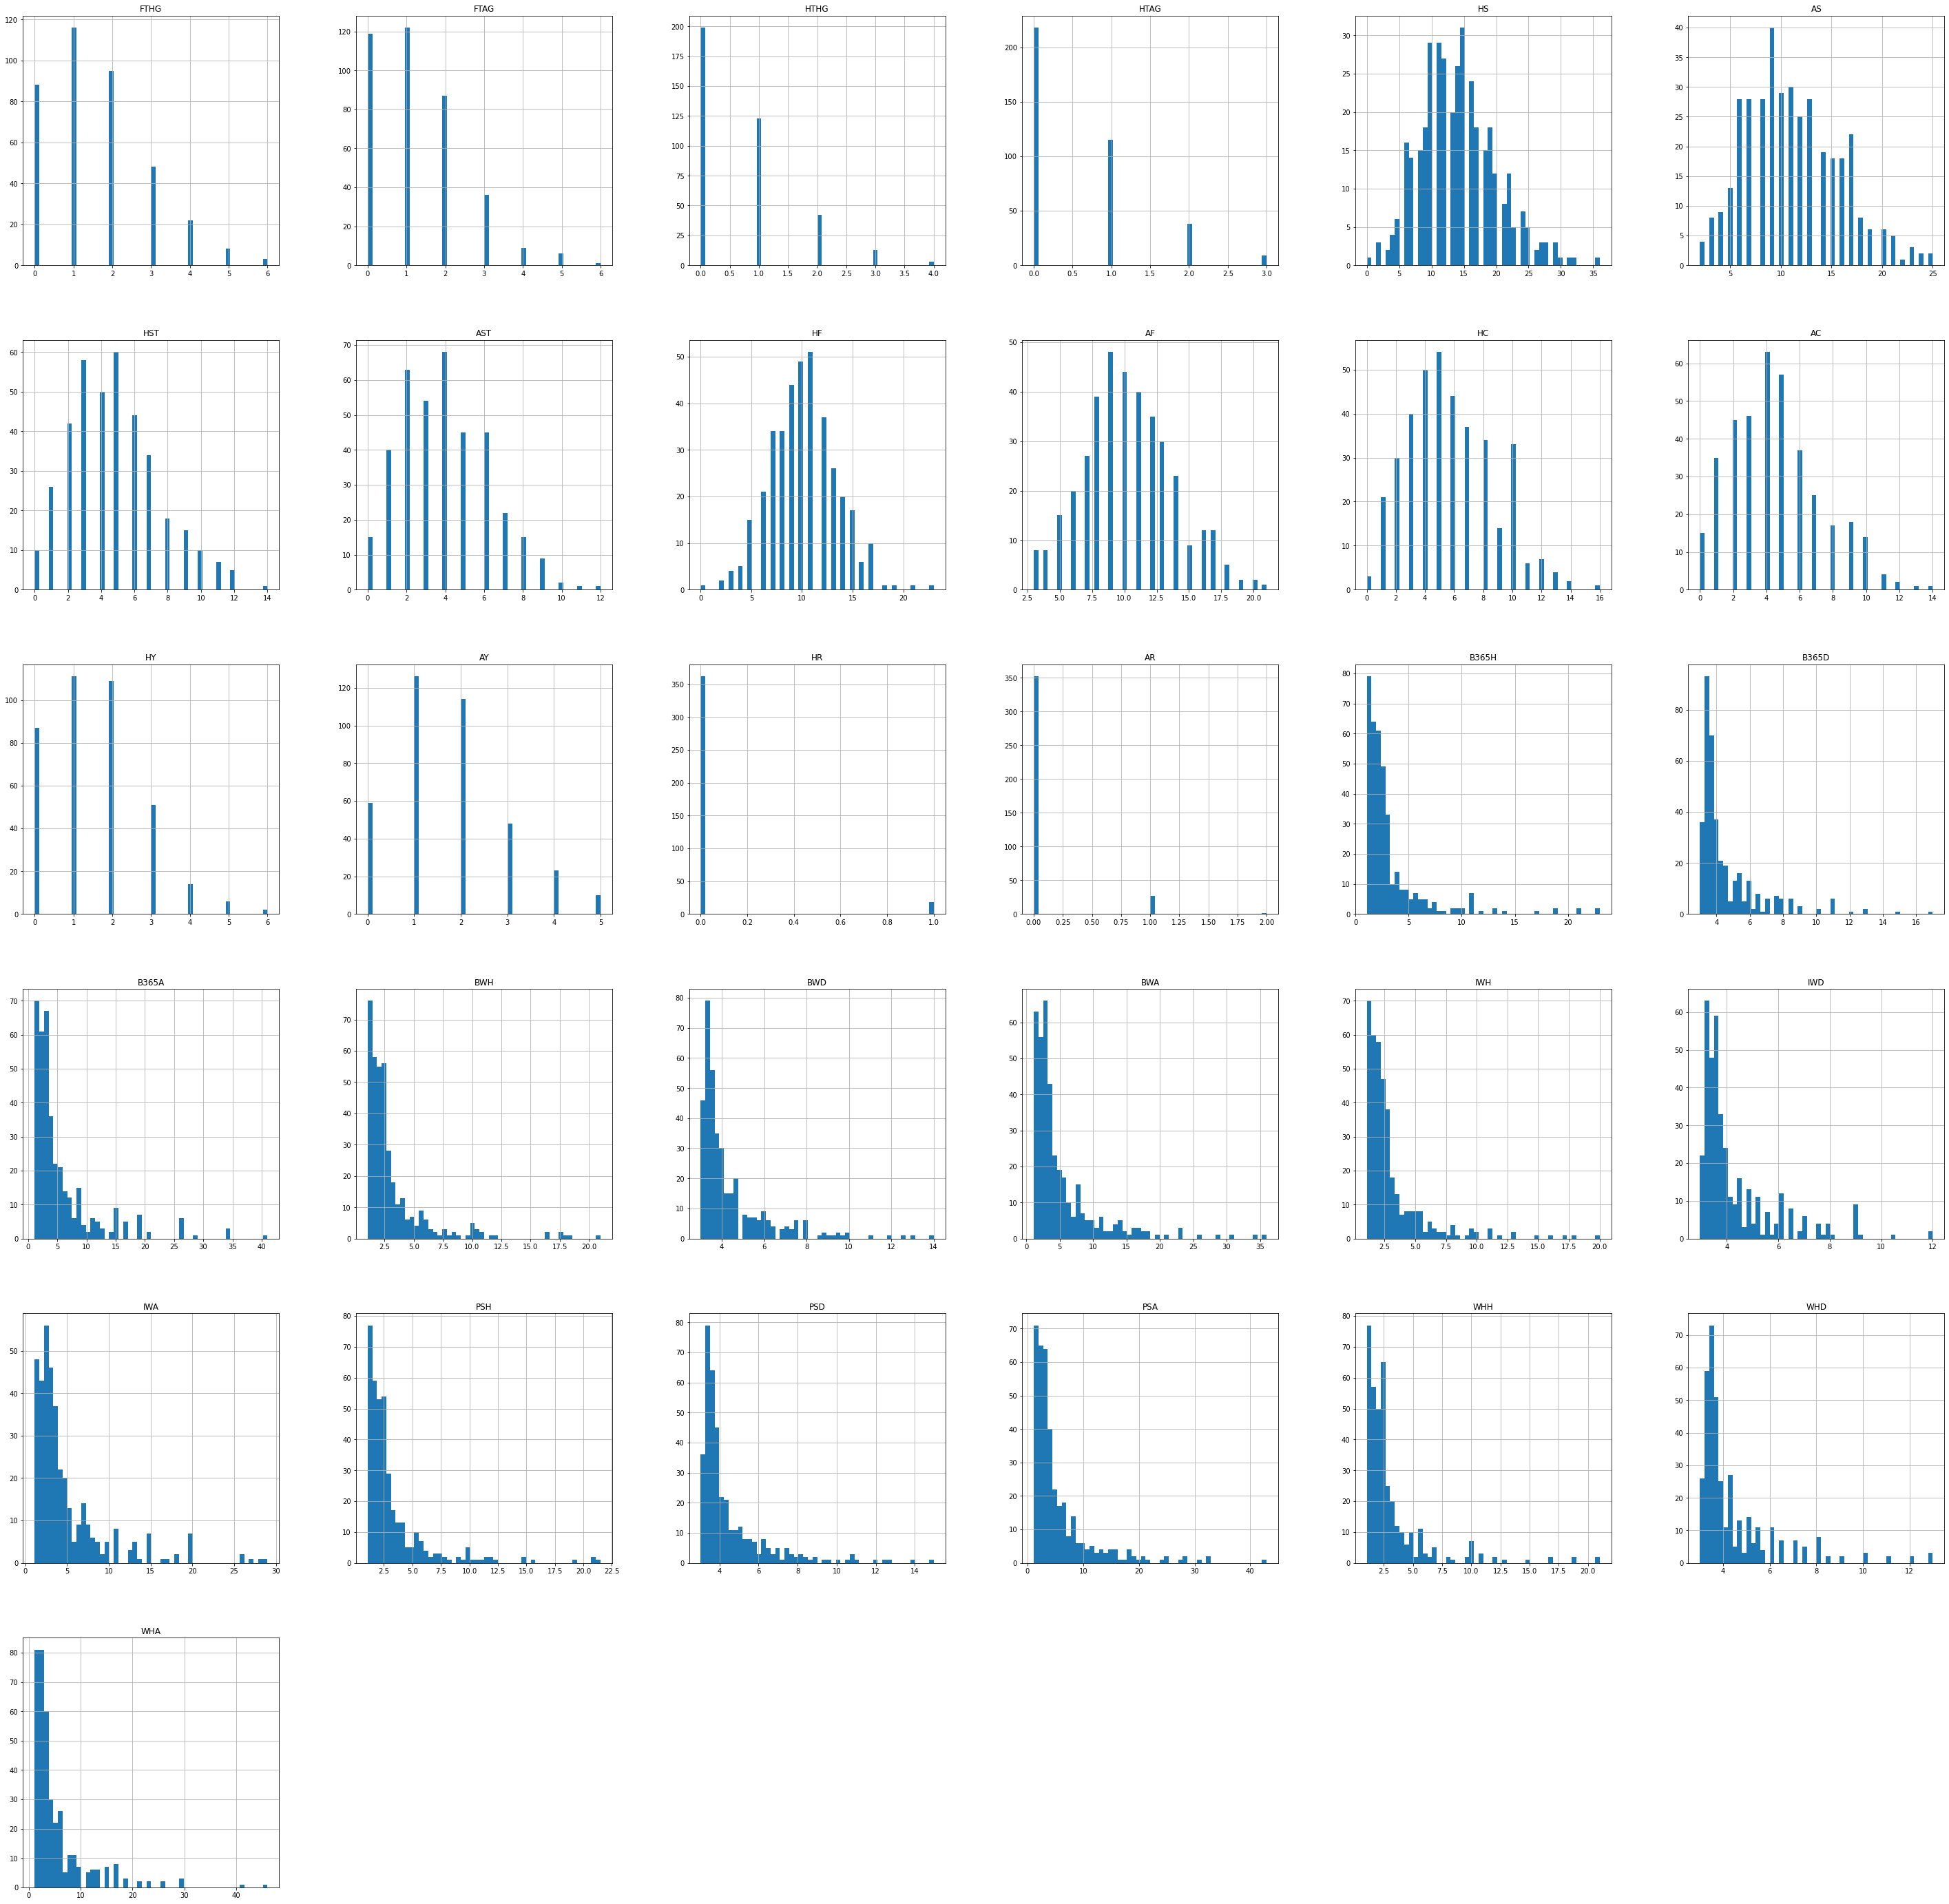

In [26]:
extended.hist(bins=50, figsize=(50,50))

<AxesSubplot:xlabel='HS', ylabel='FTHG'>

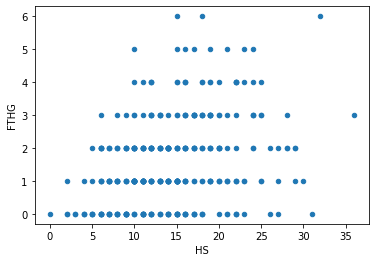

In [16]:
extended.plot(kind="scatter", x="HS", y="FTHG", alpha=1)

<AxesSubplot:xlabel='HF', ylabel='HR'>

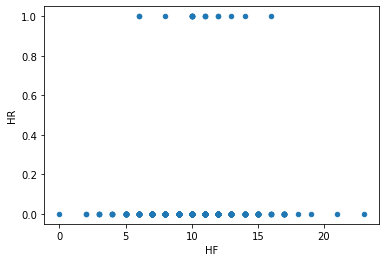

In [17]:
extended.plot(kind="scatter", x="HF", y="HR", alpha=1)

<AxesSubplot:xlabel='HS', ylabel='HST'>

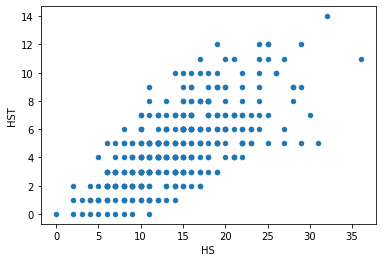

In [18]:
extended.plot(kind="scatter", x="HS", y="HST", alpha=1)

### Part 4 - Merge the data

Now that you have a better feel for each of your two (or three, for the 7394 students) data sets, it is time to merge them. Describe your strategy for merging the data sets and then actually perform the merge.  

Develop a strategy for verifying that the data is properly merged (hoping and finger-crossing are not valid strategies). 

In order to merge the data, we first narrowed the range of years in the original dataset so that they matched our extended dataset (which only contained games from 2018-2019).

In [19]:
original = original[ (original['year'] == 2018) | (original['year'] == 2019)]
display(original)

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
1520,1520,MAN UTD,LEICESTER CITY,2-1,1-0,6.4,7.4,5.6,46,54,...,14.0,8.0,1.0,0.0,0.0,2,1,1,2,2018
1521,1521,NEWCASTLE,TOTTENHAM,1-2,1-2,6.0,5.8,7.0,40,60,...,43.0,12.0,2.0,0.0,0.0,1,2,2,1,2018
1522,1522,HUDDERSFIELD,CHELSEA,0-3,0-2,5.5,5.1,8.2,37,63,...,21.0,8.0,1.0,0.0,0.0,0,3,3,0,2018
1523,1523,WATFORD,BRIGHTON,2-0,1-0,4.1,6.7,5.5,53,47,...,26.0,16.0,2.0,0.0,0.0,2,0,0,2,2018
1524,1524,BOURNEMOUTH,CARDIFF,2-0,1-0,4.5,6.9,5.2,63,37,...,30.0,9.0,1.0,0.0,0.0,2,0,0,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2275,SOUTHAMPTON,SHEFFIELD UTD,3-1,0-1,5.5,7.1,5.1,73,27,...,35.0,16.0,1.0,0.0,0.0,3,1,1,3,2019
2276,2276,CRYSTAL PALACE,TOTTENHAM,1-1,0-1,4.4,6.5,6.9,47,53,...,16.0,13.0,2.0,0.0,0.0,1,1,1,1,2019
2277,2277,MAN CITY,NORWICH,5-0,2-0,7.5,9.0,4.3,74,26,...,26.0,4.0,1.0,0.0,0.0,5,0,0,5,2019
2278,2278,NEWCASTLE,LIVERPOOL,1-3,1-1,6.0,5.2,7.5,25,75,...,8.0,5.0,0.0,0.0,0.0,1,3,3,1,2019


In order to be able to merge the datasets on the home and away team names, we had to change team names in the original dataset to match those found in the extended dataset. We changed the values of the original dataset because it contained teams that were not present in the extended dataset.

In [20]:
print(original['Home Team'].unique())
print(extended['HomeTeam'].unique())

['MAN UTD' 'NEWCASTLE' 'HUDDERSFIELD' 'WATFORD' 'BOURNEMOUTH' 'FULHAM'
 'WOLVES' 'SOUTHAMPTON' 'LIVERPOOL' 'ARSENAL' 'CARDIFF' 'TOTTENHAM'
 'EVERTON' 'WEST HAM' 'LEICESTER CITY' 'CHELSEA' 'MAN CITY' 'BURNLEY'
 'BRIGHTON' 'CRYSTAL PALACE' 'ASTON VILLA' 'NORWICH' 'SHEFFIELD UTD']
['Man United' 'Bournemouth' 'Fulham' 'Huddersfield' 'Newcastle' 'Watford'
 'Wolves' 'Arsenal' 'Liverpool' 'Southampton' 'Cardiff' 'Chelsea'
 'Everton' 'Leicester' 'Tottenham' 'West Ham' 'Brighton' 'Burnley'
 'Man City' 'Crystal Palace']


In [21]:
#Not in extended: West Brom, QPR, Stoke,
#Common: MAN UTD, LEICESTER CITY, WEST HAM, ARSENAL, LIVERPOOL, NEWCASTLE, BURNLEY, CHELSEA, SOUTHAMPTON,
# CRYSTAL PALACE, EVERTON, TOTTENHAM, MAN CITY, BOURNEMOUTH, WATFORD, BRIGHTON, HUDDERSFIELD, FULHAM, WOLVES, CARDIFF
original = original.replace(['MAN UTD'],'Man United')
original = original.replace(['LEICESTER CITY'],'Leicester')
original = original.replace(['WEST HAM'],'West Ham')
original = original.replace(['ARSENAL'],'Arsenal')
original = original.replace(['LIVERPOOL'],'Liverpool')
original = original.replace(['NEWCASTLE'],'Newcastle')
original = original.replace(['BURNLEY'],'Burnley')
original = original.replace(['CHELSEA'],'Chelsea')
original = original.replace(['SOUTHAMPTON'],'Southampton')
original = original.replace(['CRYSTAL PALACE'],'Crystal Palace')
original = original.replace(['EVERTON'],'Everton')
original = original.replace(['TOTTENHAM'],'Tottenham')
original = original.replace(['MAN CITY'],'Man City')
original = original.replace(['BOURNEMOUTH'],'Bournemouth')
original = original.replace(['WATFORD'],'Watford')
original = original.replace(['BRIGHTON'],'Brighton')
original = original.replace(['HUDDERSFIELD'],'Huddersfield')
original = original.replace(['FULHAM'],'Fulham')
original = original.replace(['WOLVES'],'Wolves')
original = original.replace(['CARDIFF'],'Cardiff')
display(original)

,Unnamed: 0,Home Team,Away Team,Score,Half Time Score,Match Excitement,Home Team Rating,Away Team Rating,Home Team Possession %,Away Team Possession %,...,Away Team Clearances,Away Team Fouls,Away Team Yellow Cards,Away Team Second Yellow Cards,Away Team Red Cards,Home Team Goals Scored,Away Team Goals Scored,Home Team Goals Conceeded,Away Team Goals Conceeded,year
1520,1520,Man United,Leicester,2-1,1-0,6.4,7.4,5.6,46,54,...,14.0,8.0,1.0,0.0,0.0,2,1,1,2,2018
1521,1521,Newcastle,Tottenham,1-2,1-2,6.0,5.8,7.0,40,60,...,43.0,12.0,2.0,0.0,0.0,1,2,2,1,2018
1522,1522,Huddersfield,Chelsea,0-3,0-2,5.5,5.1,8.2,37,63,...,21.0,8.0,1.0,0.0,0.0,0,3,3,0,2018
1523,1523,Watford,Brighton,2-0,1-0,4.1,6.7,5.5,53,47,...,26.0,16.0,2.0,0.0,0.0,2,0,0,2,2018
1524,1524,Bournemouth,Cardiff,2-0,1-0,4.5,6.9,5.2,63,37,...,30.0,9.0,1.0,0.0,0.0,2,0,0,2,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,2275,Southampton,SHEFFIELD UTD,3-1,0-1,5.5,7.1,5.1,73,27,...,35.0,16.0,1.0,0.0,0.0,3,1,1,3,2019
2276,2276,Crystal Palace,Tottenham,1-1,0-1,4.4,6.5,6.9,47,53,...,16.0,13.0,2.0,0.0,0.0,1,1,1,1,2019
2277,2277,Man City,NORWICH,5-0,2-0,7.5,9.0,4.3,74,26,...,26.0,4.0,1.0,0.0,0.0,5,0,0,5,2019
2278,2278,Newcastle,Liverpool,1-3,1-1,6.0,5.2,7.5,25,75,...,8.0,5.0,0.0,0.0,0.0,1,3,3,1,2019


#### Performing the merge
Now that the team names were identical in both datasets and the other variables we planned to join on were also congruent, we merged the datasets. In order to uniquely identify specific matches we joined the datasets on multiple variables. We used an inner join to merge the datasets so that only matches found in both datasets would be included in the resultant dataset.

In [22]:
merged = pd.merge(extended, original,  how='inner', left_on=['HomeTeam','AwayTeam','HS','AS','HF','AF'], right_on = ['Home Team','Away Team','Home Team Total Shots','Away Team Total Shots','Home Team Fouls','Away Team Fouls'])

Because both the original and extended datasets contained multiple identical columns, we dropped all duplicate columns from the merged dataset. We also dropped the "Unnamed: 0" column found in the original dataset as it served as an index for the games. However, Pandas dataframes have built-in indices that made this column unnecessary.

In [23]:
toDrop = ['HomeTeam','AwayTeam','HS','AS','HF','AF','FTHG','FTAG','FTR','HST','AST','HC','AC','HY','AY','HR','AR']
for i in toDrop:
    merged.drop(i, inplace=True, axis=1)
merged.drop('Unnamed: 0', inplace=True, axis=1)

The original dataset contained 760 rows and the extended dataset contained 380 rows. Because of this we know that our merged dataset should contain no more than 380 rows(games). When we originally performed the merge we attempted to use a left join, which resulted in a dataset with several rows containing null values. This told us that not every game from the extended dataset was contained in the original dataset. When we performed the inner join, we received 346 rows containing 0 null values, indicating that our 2 datasets had 346 games in common. 

In [24]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 346 entries, 0 to 345
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Div                            346 non-null    object 
 1   Date                           346 non-null    object 
 2   HTHG                           346 non-null    int64  
 3   HTAG                           346 non-null    int64  
 4   HTR                            346 non-null    object 
 5   Referee                        346 non-null    object 
 6   B365H                          346 non-null    float64
 7   B365D                          346 non-null    float64
 8   B365A                          346 non-null    float64
 9   BWH                            346 non-null    float64
 10  BWD                            346 non-null    float64
 11  BWA                            346 non-null    float64
 12  IWH                            346 non-null    flo

### Part 5 - Explore Bivariate relationships

- Choose a reasoned set of variables to explore further.  You don't have to explore all possible pairs of variables, nor do we want to grade that much.  Choose 7 - 9 variables. One should be a variable that you'd like to predict (target variable) using the others (predictor variables). 
- List your predictor variables
- List your target variable
- Briefly describe why you have chosen these. 

Use any of the available visualizations from Seaborn to explore the relationships between the variables. Explore the relationships among the predictor variables as well as the relationship between each predictor variable and the target variable.  Which of the predictor variables are most strongly related?  Are there any interesting relationships between categorical predictors and numeric predictors?  If there are any dichotomous variables, does that influence any of the relationships? Are the relationships positive or negative? 

Below each plot, you should provide a description and interpretation of the plot.  Make sure to include why the variables in that plot were chosen and what you hope the reader would gain from it as well. 

##### Target Variable: Away Team Goals Scored
We decided to choose Away Team Goals Scored as our target variable because we felt that a lot of variables in the dataset would influence it. Intuitively we felt that Away Team Goals Scored would have a strong correlation with the predictor variables we chose.
##### Predictor Variables:
 - **Away Team Possession %** : The time of possession in a football tends to have a large impact on the outcome of a game, so we wanted to know how strongly it impacted the number of goals scored. 
 - **Away Team Pass Success %** : A high pass success rate may correspond to how well a team is performing offensively, which may affect the goals scored.
 - **Away Team On Target Shots** : A high on-target shot count should directly correlate to the number of goals scored, as all goals scored in a game come from an on-target shot.
 - **Away Team Rating** : A team's rating measures the performance of a team throughout the season. Teams that are performing well likely score more goals in a game, which might make this a strong predictor of goals scored.
 - **Away Team Fouls** : Fouls often give possession of the ball to the opposing team and result in fewer chances for a team to score goals. We were curious to see how this affects the goals scored by a team.
 
 These 4 variables refer to the away team odds for winning a given game. The 4 values are provided by 4 bookmakers who all gave different odds to the away team. The more goals a team scores in a game, the higher their chance of winning. It follows that a team with good odds would score more goals in a game. We wanted to know how well the odds given by these bookmakers could predict the number of goals scored.
 
 
 - **B365A** 
 - **BWA**
 - **IWA**
 - **PSA**
 

<AxesSubplot:>

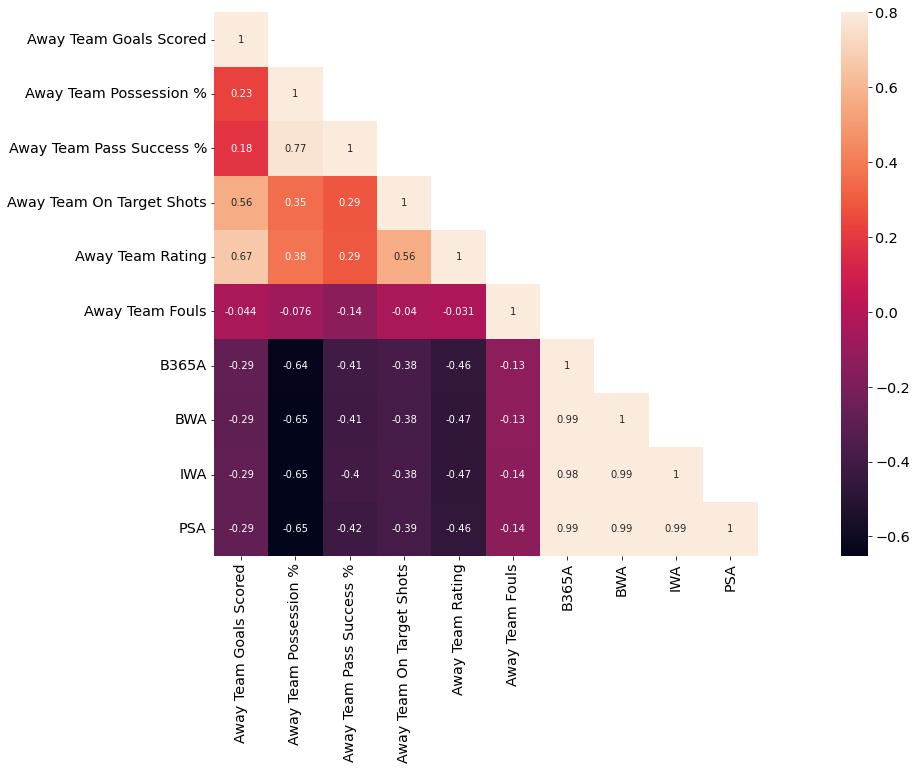

In [32]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (30, 10),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

corrMatt = merged[["Away Team Goals Scored","Away Team Possession %","Away Team Pass Success %",
                    "Away Team On Target Shots","Away Team Rating",
                    "Away Team Fouls","B365A",
                    "BWA", "IWA", "PSA"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corrMatt, mask=mask,
           vmax=.8, square=True,annot=True)

This plot shows us the correlation values between all the variables. We felt this was important because it shows the correlations between the predictor variables and the target variables as well as the relationship between the predictor variables.

In the graph we can see that the predictor variables most strongly correlated with the number of goals scored are the Away Team Rating and the Away Team On Target Shots. 0.56 and 0.67 are strong correlations and would likely be good predictors of the goals scored. The Team Possession % and Team Pass Success % are slightly less positively correlated with the goals scored which would suggest that they are less reliable predictors. Away Team Fouls has a very slightly negative correlation with goals scored which indicates that the less fouls a team commits, the more goals they score. However, they have a correlation value of -0.044 which suggests that fouls are a bad predictor of goals scored. All 4 of the betting odds variables are negatively correlated with goals scored. This is because the lower the odds given by a bookmaker, the lower the risk is for betting on that team and the lower the payout is for that team winning. Lower odds indicate that a team is more likely to win the game, which explains the negative correlation. All 4 variables have a correlation value of -0.29 which would make them strong predictors of goals scored.

Between predictor variables, Pass Success % and Possession % are strongly positively correlated because more successful passes indicates that a team is maintaining possession. All 4 betting odds variables are strongly negatively correlated with Possession %, which suggests that a team favored to win maintains more possession over the course of a game. Away Team Fouls has a near 0 correlation with all other variables, which suggests that it isn't a strong predictor of any of the values we selected.

<AxesSubplot:xlabel='Away Team Rating', ylabel='Away Team Goals Scored'>

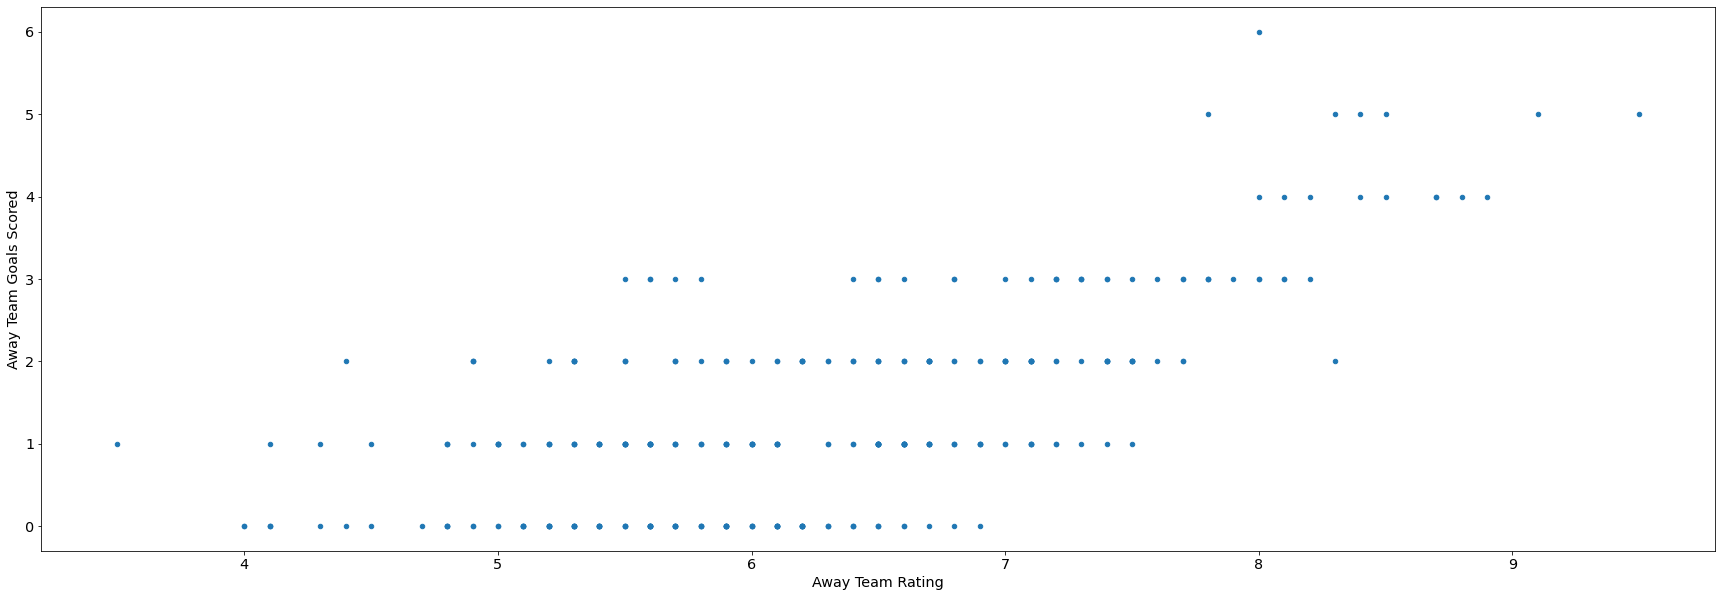

In [50]:
merged.plot(kind="scatter", x="Away Team Rating", y="Away Team Goals Scored", alpha=1)

This graph relates the Away Team Goals Scored to the Away Team Rating. The distribution of games shifts to the right for each row in the graph as the number of goals scored increases. This shows that on average as a team's rating increases, the number of goals they score also increases. From this chart we can also see that all teams that scored at least 4 goals had a very high rating. There are noticeable outliers which occur when highly-rated teams have poor games, however the overall trend of the graph shows that the ratings are positively correlated with goals scored.

<AxesSubplot:xlabel='B365A', ylabel='Away Team Goals Scored'>

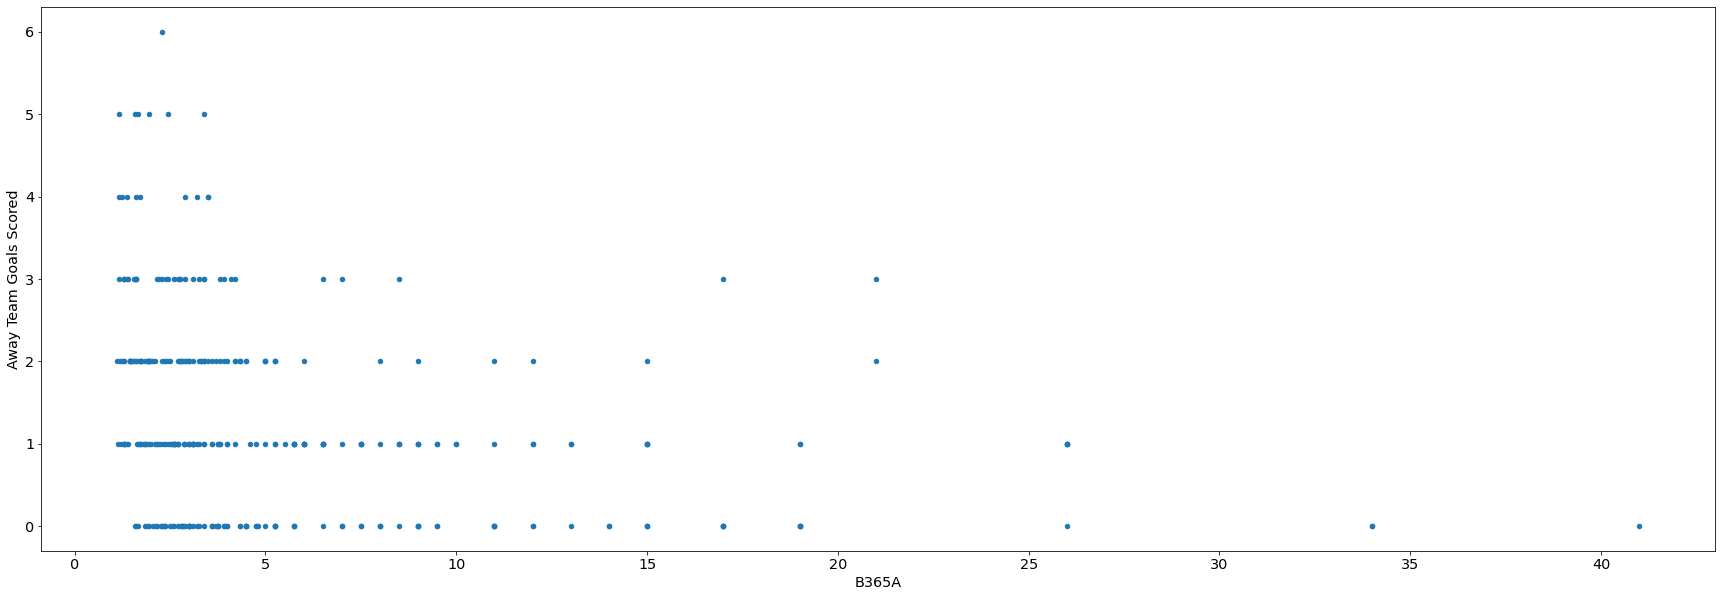

In [49]:
merged.plot(kind="scatter", x="B365A", y="Away Team Goals Scored", alpha=1)

This graph relates the Away Team Goals Scored to the betting odds assigned to the away team. Because lower odds indicate that a team is more likely to win, as the number of goals increases we should see better betting odds for a team. This trend can be seen because for each row in the chart, as the number of goals scored increases the distribution of games shifts to the left. Games where the away team had odds over 30 the away team scored 0 goals. All the teams that scored at least 4 goals had odds below 5. This graph illustrates the negative correlation between the goals scored and the betting odds for a team.

<AxesSubplot:xlabel='Away Team On Target Shots', ylabel='Away Team Goals Scored'>

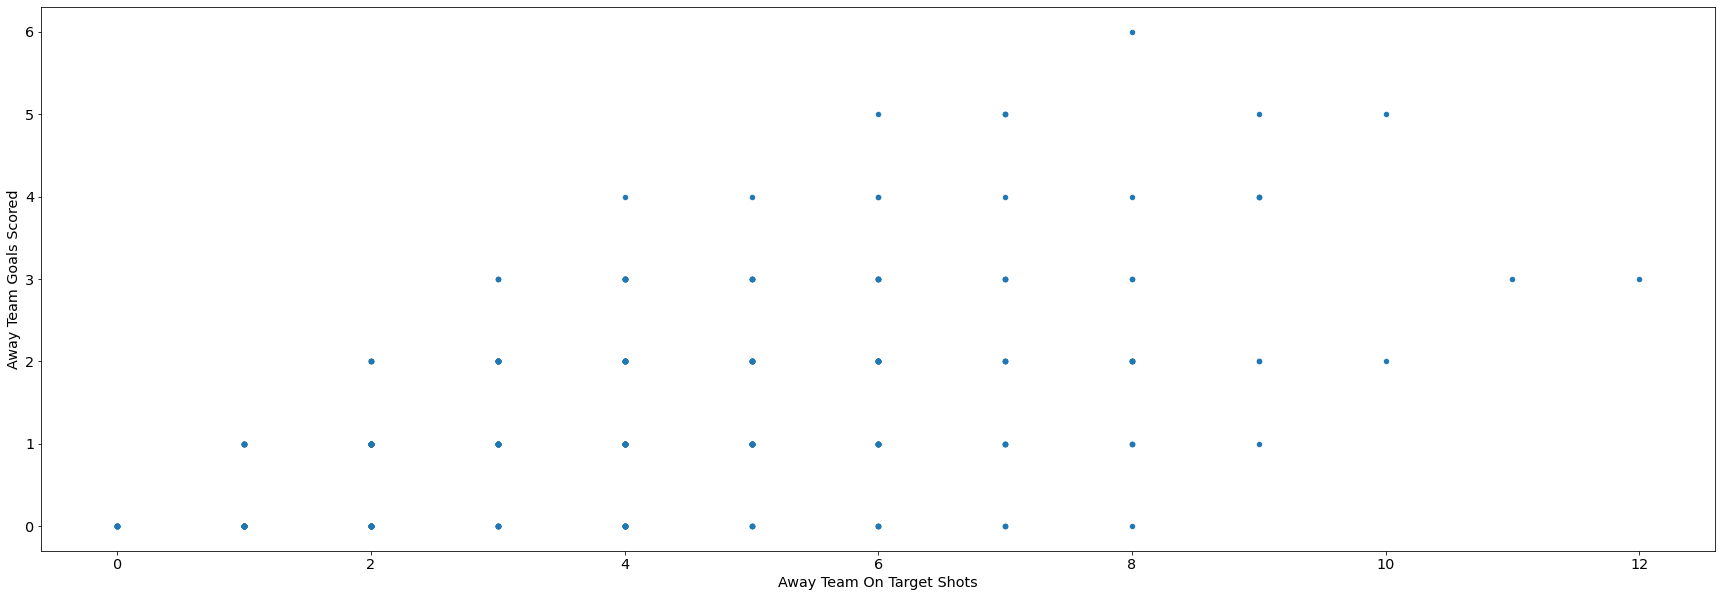

In [51]:
merged.plot(kind="scatter", x="Away Team On Target Shots", y="Away Team Goals Scored", alpha=1)

This graph relates the Away Team Goals Scored to the Away Team On Target Shots. A positive correlation can be seen between the two variables as the games with more shots on target also appear to be those with more goals scored. Shots on Target may be a reliable predictor for goals scored as the number of goals scored in a game can never exceed the number of shots on target. This means you can narrow the range of possible values for the number of goals scored given the shots on target.

<AxesSubplot:xlabel='Away Team Fouls', ylabel='Away Team Goals Scored'>

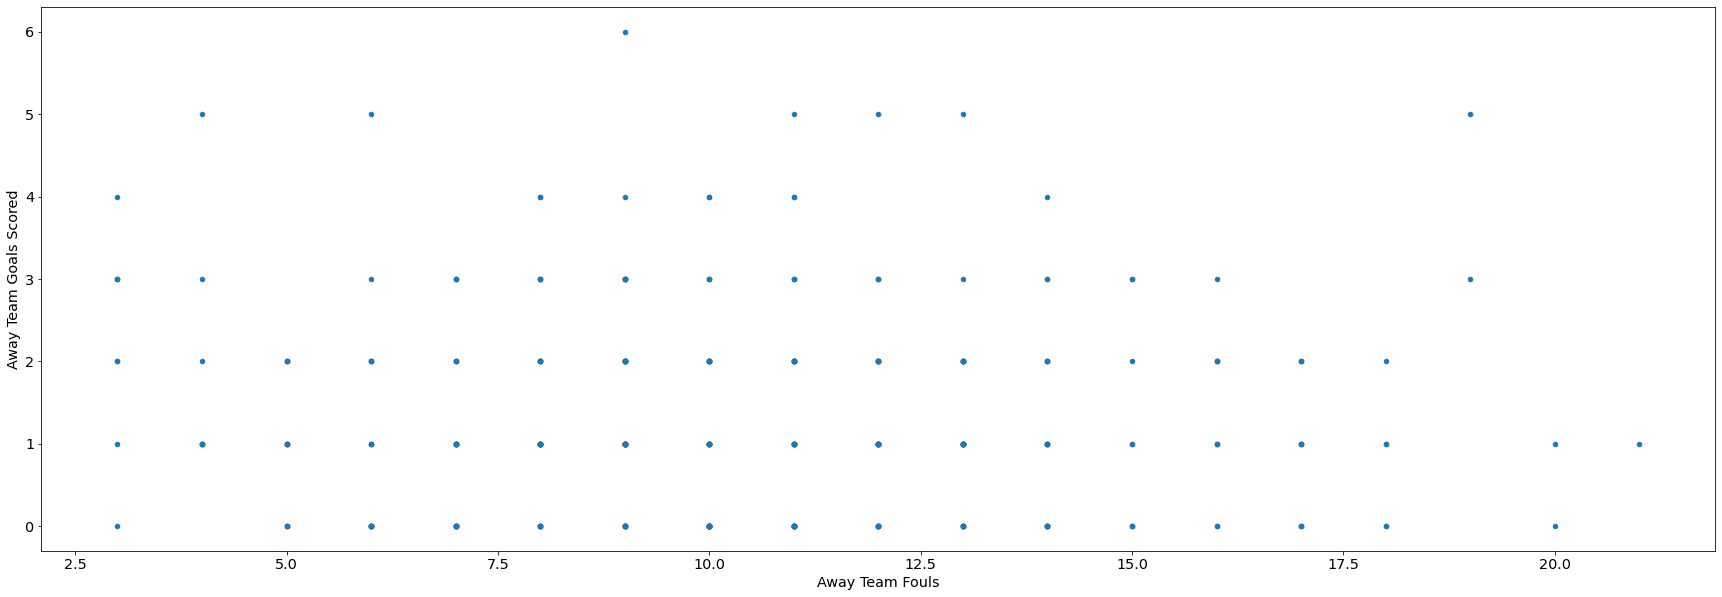

In [52]:
merged.plot(kind="scatter", x="Away Team Fouls", y="Away Team Goals Scored", alpha=1)

This graph relates the Away Team Fouls with the Away Team Goals Scored. Unlike the other graphs, this graph doesn't have an immediately visible trend. This is because fouls are very poorly correlated with number of goals scored. This is illustrated by the games where a team scored 5 goals. If these 2 variables had a strong correlation we would expect all teams in this row to have a low number of fouls but there is a wide range of fouls. Some teams that score 5 goals did have low fouls but a majority of them had around 12.5 fouls and one team that scored 5 goals even had 19 fouls. This shows that there is not a strong correlation between these variables and that Away Team Fouls is a poor predictor of goals scored.

<AxesSubplot:xlabel='Away Team Possession %', ylabel='Away Team Goals Scored'>

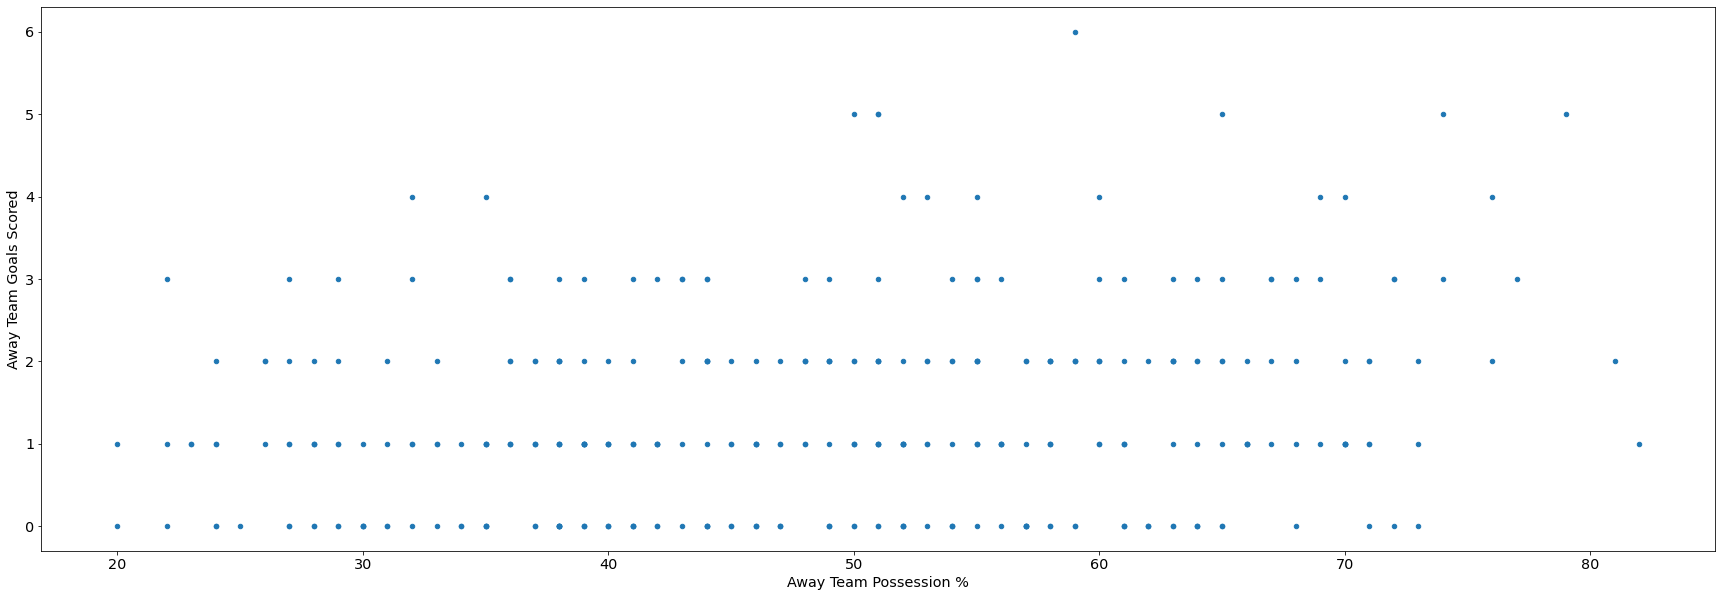

In [54]:
merged.plot(kind="scatter", x="Away Team Possession %", y="Away Team Goals Scored", alpha=1)

This graph relates Away Team Goals Scored to Away Team Possession %. From the correlation heatmap we know that these two variables have a moderately high correlation. This can be seen in the graph as the distribution of games shifts to the right for each row in the graph as the number of goals scored increases. This trend isn't as noticeable as the one found between goals scored and team rating, which are more strongly correlated. Nonetheless, this chart shows the positive correlation between goals and possession and suggests that possession % would be a decent option as a predictor variable.